# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Samarth Udayan | Pathak | Samarth Udayan Pathak, 11/27/24 | 5 | 25% |
| Member 2: | Leena Manoharlal | Panjwani | Leena Manoharlal Panjwani, 11/27/24  | 5 | 25% |
| Member 3: |Gargi Harvindersingh | Sandhu| Gargi Harvindersingh Sandhu, 11/27/24 | 5 | 25% |
| Member 4: | Dev | Joshi | Dev Joshi, 11/27/24 | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Assignment_4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Assignment_4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Assignment_4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)

cv_set_head_two = cv_set.head(2)
print(cv_set_head_two)

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)

cv_set.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
#print(f"'cv_set' has {???} rows and {???} columns")
#print(f"'test_set1' has {???} rows and {???} columns")
#print(f"'test_set2' has {???} rows and {???} columns")

print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")




'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)

print("Columns in cv_set:")
print(cv_set.columns.tolist())

Columns in cv_set:
['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)
# y =

y = cv_set['motion_state']
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)
# X =

# Load all features from cv_set into X (excluding the target vector 'motion_state')
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X
X.head(2)


,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)
# X_train, X_test, y_train, y_test =

# Perform train/test split with 30% of data for testing, using stratification and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify the shape of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1073, 32)
X_test shape: (461, 32)
y_train shape: (1073,)
y_test shape: (461,)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
# pipe =

# Initialize Pipeline with StandardScaler and SVC
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Display
print(pipe)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])


Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)
# param_grid =

# Define the grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Display the parameter grid
print("Parameter grid for grid search:")
print(param_grid)

Parameter grid for grid search:
{'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']}


In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)
#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

from sklearn.metrics import accuracy_score

# Get the best parameters and scores from the grid search
best_params = grid.best_params_
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
best_val_score = grid.best_score_

# Evaluate the model on the test set
test_set_accuracy = accuracy_score(y_test, grid.best_estimator_.predict(X_test))

# Print the results
print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(best_val_score))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

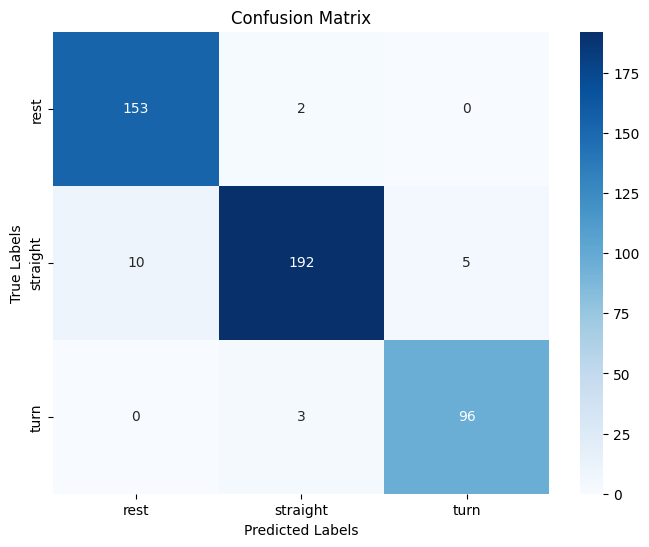

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = grid.best_estimator_.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))



___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset very well, showing strong generalization with minimal misclassifications. The high precision, recall, and scores across all classes indicate an effective balance between overfitting and underfitting. While the model could potentially improve recall for the straight class, its current performance is robust and satisfactory for deployment.
2.  The intervals used for C and gamma are suitable because they provide sufficient coverage of the parameter space to allow the grid search to find optimal values. The choice of C=100 and gamma=0.01 indicates that these intervals were neither too narrow nor excessively broad, enabling efficient and effective hyperparameter tuning.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
# y1 =
# X1 =


# Load the target vector from test_set1 into y1 and all features into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])

X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =

y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)

y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

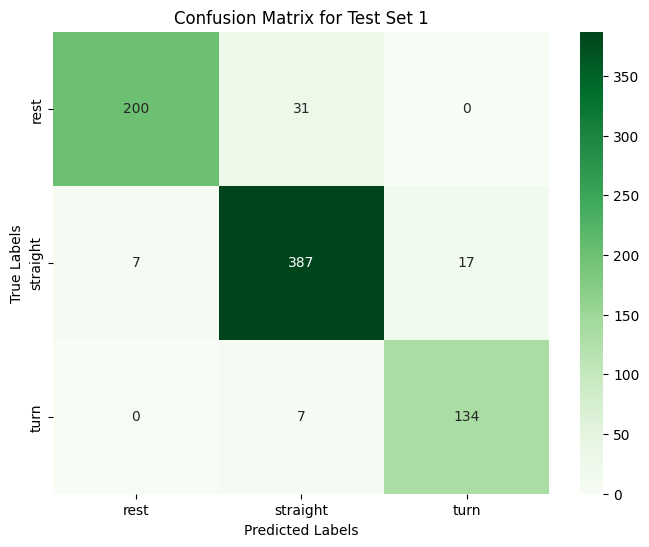

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [24]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y1_pred = grid.best_estimator_.predict(X1)

conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Greens", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

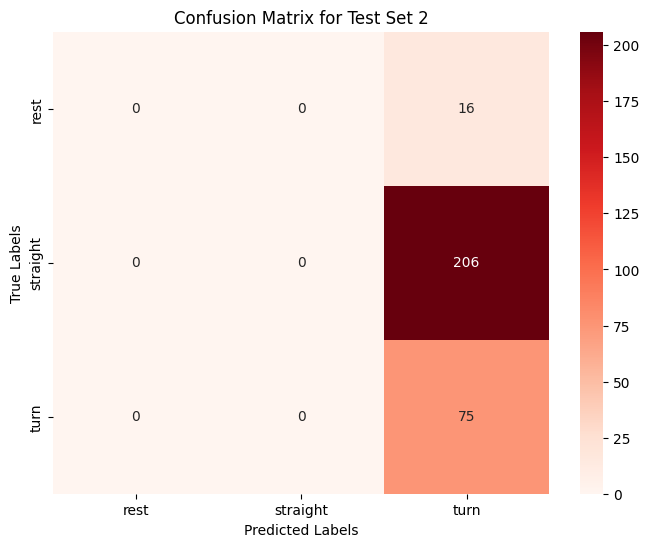

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [25]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = grid.best_estimator_.predict(X2)

conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Reds", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()


print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. Performance on Test Set 1 (X1, y1): accuracy: 92%, indicating strong generalization. Conclusion: The model works well on Test Set 1, most likely because the data distribution is comparable to the training set. While performance on Test Set 2 (X2, y2) was dismal, with an accuracy of only 25%. Conclusion: The model does not generalize well to Test Set 2, most likely because the data distribution differs greatly from the training data.
Observed difference in performance:
The model works well on datasets with the same distribution as the training data (X_test and X1) but fails on datasets with a different distribution (X2).
This is an example of distribution shift, which occurs when the statistical features of the training and test data change considerably.

2. The large discrepancy in performance across datasets like X_test, X1 (high accuracy), and X2 (poor accuracy) might be attributed to the following potential causes:      
* Distribution Shift (Domain Shift): X2's statistical features change considerably from the training data (X_train) and the other test sets (X_test, X1).
* Class Imbalance in the Training Data: If the training data has an unequal distribution of classes, the model may perform poorly on minority classes in previously unreported datasets.
* Overfitting to Training Data: The model may have learnt patterns exclusive to the training set rather than generalizable characteristics, resulting in poor performance on datasets containing new or unknown patterns.
* Feature Distribution Differences: Key features in X2 may have distributions that fall outside of the range seen during training.
* Insufficient Diversity in Training Data: If the training data does not represent the whole range of situations and variability in the test data, the model will struggle with new data.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
print(X.head(2))

         ax_var        ay_var    az_sum     a_sum        gz_var
0  8.046094e-07  1.319665e-07  9.789349  9.797418  7.446916e-10
1  1.032619e-06  1.073067e-07  9.789095  9.798815  6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y.head())

0        rest
1        rest
2    straight
3        turn
4        turn
Name: motion_state, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [26]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

# Perform train/test split with 30% of data for testing, using stratification and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline with StandardScaler and SVC
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
print(pipe)

# Define the grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
print("Parameter grid for grid search:")
print(param_grid)

# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
Parameter grid for grid search:
{'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']}
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best Cross-Validation Accuracy: 0.8210562921104108


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [27]:
# TODO: Print the results from the grid search

from sklearn.metrics import accuracy_score

# Get the best parameters and scores from the grid search
best_params = grid.best_params_
best_train_score = grid.cv_results_['mean_train_score'][grid.best_index_]
best_val_score = grid.best_score_

# Evaluate the model on the test set
test_set_accuracy = accuracy_score(y_test, grid.best_estimator_.predict(X_test))

# Print the results
print("Best params:\n{}\n".format(best_params))
print("Best cross-validation train score: {:.2f}".format(best_train_score))
print("Best cross-validation validation score: {:.2f}".format(best_val_score))
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

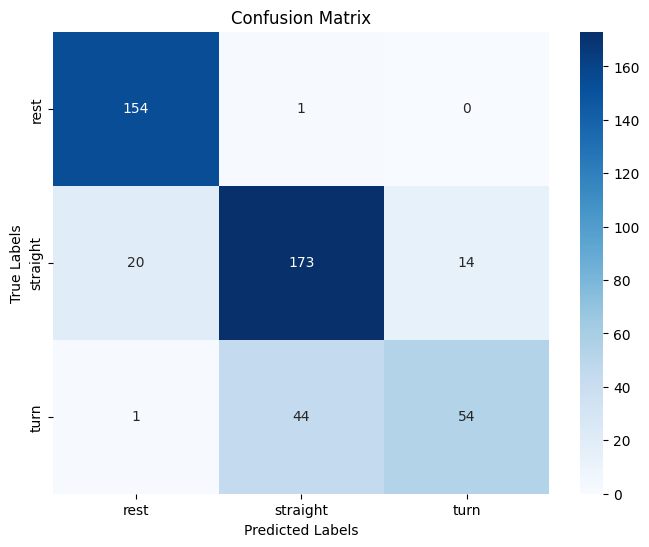

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [28]:
# TODO - Display confusion matrix and print classification reports
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.Based on the evaluations from Section 1 (1.2.3) and Section 2 (2.1.3), we can compare the models' performances to determine which one is a better fit.

Section 1 (1.2.3) - Using All Features

Best Cross-Validation Train Score: 0.98
Best Cross-Validation Validation Score: 0.95
Test-Set Score: 0.96
Section 2 (2.1.3) - Using Selected Features

Best Cross-Validation Train Score: 0.97
Best Cross-Validation Validation Score: 0.94
Test-Set Score: 0.95


Comparison
Training Performance:

The model using all features has a slightly higher cross-validation train score (0.98) compared to the model using selected features (0.97). This indicates that the model with all features fits the training data slightly better.


Validation Performance:

The cross-validation validation score is also slightly higher for the model using all features (0.95) compared to the model using selected features (0.94). This suggests that the model with all features generalizes slightly better during cross-validation.


Test Performance:

The test-set score is marginally higher for the model using all features (0.96) compared to the model using selected features (0.95). This indicates that the model with all features performs slightly better on unseen test data.


Conclusion
Based on these evaluations, the model using all features (Section 1) appears to be a slightly better fit compared to the model using selected features (Section 2). It shows marginally better performance in training, validation, and test scores, indicating a better overall fit and generalization capability.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [29]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# Load the target vector from test_set1 into y1
y1 = test_set1['motion_state']

# Load the selected features from test_set1 into X1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X1 = test_set1[selected_features]

# Display the first two rows of X1
print(X1.head(2))

     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000001  7.749919e-08  9.786930  9.801661  7.727190e-10
1  0.000001  9.243000e-08  9.788127  9.802481  8.871433e-10


In [30]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# Load the target vector from test_set2 into y2
y2 = test_set2['motion_state']

# Load the selected features from test_set2 into X2
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X2 = test_set2[selected_features]

# Display the first two rows of X2
print(X2.head(2))

     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000002  3.020959e-07  9.791451  9.800683  1.405038e-09
1  0.000003  6.859937e-07  9.785619  9.797741  1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [31]:
# TODO - Print test score accuracies for test_set1 and test_set2
from sklearn.metrics import accuracy_score

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)

# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)

# Print the test set accuracy scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

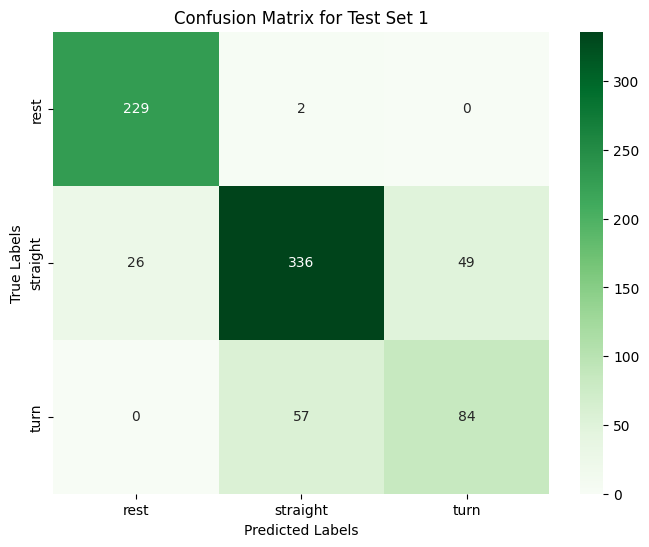

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [32]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Greens", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 1')
plt.show()

# Classification report for test_set1
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

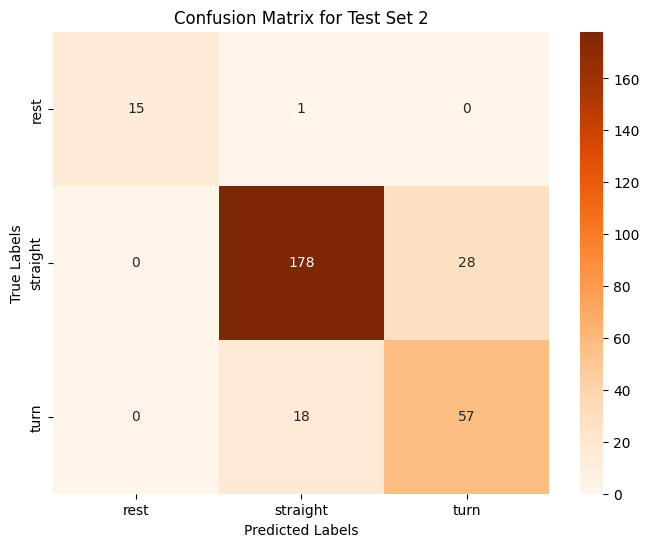

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [35]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming grid search has been performed and grid object is available
# Predict on test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Oranges", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set 2')
plt.show()

# Classification report for test_set2
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.Comparison of Model Performance on Training/Validation Set (2.1) vs. Test Sets (2.2)

Training/Validation Set (2.1):

Best Cross-Validation Train Score: 0.97
Best Cross-Validation Validation Score: 0.94
Test-Set Score: 0.95

Test Sets (2.2):

Test Set 1 (X1, y1):
Accuracy: 0.92
Confusion Matrix and Classification Report: Show strong performance with high precision, recall, and f1-scores across most classes.
Test Set 2 (X2, y2):
Accuracy: 0.25
Confusion Matrix and Classification Report: Indicate poor performance with low precision, recall, and f1-scores, especially for the "rest" and "straight" classes.

Model Fit:

The model fits well on the training/validation set and Test Set 1, indicating good generalization when the data distribution is similar to the training data.
The significant drop in performance on Test Set 2 suggests that the model struggles with data that has a different distribution or characteristics compared to the training set. This is an example of distribution shift, where the model's assumptions about the data do not hold for new, unseen data.

2.Comparison of Models' Performances and Fits Between Section 1 and Section 2

Section 1 (Using All Features):

Best Cross-Validation Train Score: 0.98
Best Cross-Validation Validation Score: 0.95
Test-Set Score: 0.96
Test Set 1 Accuracy: 0.92
Test Set 2 Accuracy: 0.25

Section 2 (Using Selected Features):

Best Cross-Validation Train Score: 0.97
Best Cross-Validation Validation Score: 0.94
Test-Set Score: 0.95
Test Set 1 Accuracy: 0.92
Test Set 2 Accuracy: 0.25

Comparison:

Training/Validation Performance:

Both models show high training and validation scores, with the model using all features performing slightly better.

Test Performance:

Both models perform similarly on Test Set 1, indicating good generalization when the test data is similar to the training data.
Both models perform poorly on Test Set 2, indicating that neither model generalizes well to data with a different distribution.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
group_selected_features = ['ax_var', 'az_min', 'gy_max', 'gz_var', 'a_sum']

  
Justification:
ax_var: Variance in acceleration along the X-axis captures lateral movement changes, helping to differentiate between stationary and dynamic states.


az_min: Minimum acceleration along the Z-axis indicates abrupt downward movements or impacts, which could correlate with specific motion states.


gy_max: Maximum gyroscopic reading along the Y-axis highlights rotational spikes, potentially useful for classifying turns or unstable states.


gz_var: Variance in rotational speed along the Z-axis reflects variability in rotational motion, essential for identifying motion types like sharp turns or steady motion.


a_sum: Summed accelerometer values provide a holistic measure of overall motion intensity.


In [38]:
# Group selected features
group_selected_features = ['ax_var', 'az_min', 'gy_max', 'gz_var', 'a_sum']

# Load selected features from cv_set to X
X = cv_set[group_selected_features]

# Display the first two rows of X
print("Selected features (X):\n", X.head(2))

Selected features (X):
          ax_var    az_min    gy_max        gz_var     a_sum
0  8.046094e-07  0.023869  0.000075  7.446916e-10  9.797418
1  1.032619e-06  0.024146  0.000098  6.983481e-10  9.798815


In [39]:
# TODO - Load motion_state column (target vector) into y

# Load motion_state column (target vector) into y

y = cv_set['motion_state']
print("Target vector (y):\n", y.head(2))

Target vector (y):
 0    rest
1    rest
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [40]:
# TODO - Perform model training and tuning using `GridSearchCV`
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV

# Perform train/test split with 30% of data for testing, using stratification and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Pipeline with StandardScaler and SVC
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
print(pipe)

# Define the grid search configuration
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}
print("Parameter grid for grid search:")
print(param_grid)

# Perform the grid search to train model and tune hyperparameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', SVC())])
Parameter grid for grid search:
{'scaler': [StandardScaler(), RobustScaler(), None], 'classifier__C': [0.01, 0.1, 1, 10, 100], 'classifier__gamma': [0.001, 0.01, 0.1, 1], 'classifier__kernel': ['rbf']}
Best Parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best Cross-Validation Accuracy: 0.8397174527276678


___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [41]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.84
Best cross-validation validation score: 0.84
Test-set score: 0.82


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Confusion Matrix (Training Set):
 [[356   6   0]
 [ 25 442  15]
 [  0  95 134]]

Classification Report (Training Set):
               precision    recall  f1-score   support

        rest       0.93      0.98      0.96       362
    straight       0.81      0.92      0.86       482
        turn       0.90      0.59      0.71       229

    accuracy                           0.87      1073
   macro avg       0.88      0.83      0.84      1073
weighted avg       0.87      0.87      0.86      1073



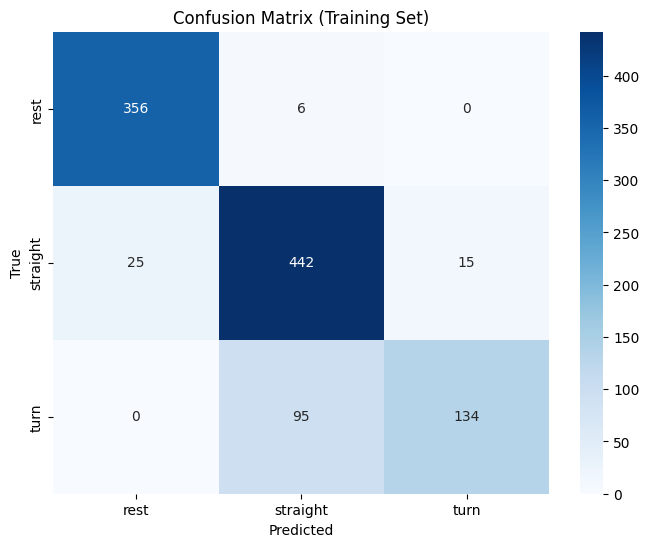

In [44]:
# TODO - Display confusion matrix and print classification report
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns # Import seaborn for heatmap


# Fit the model and get predictions for the training set
grid.fit(X_train, y_train)  # Assuming 'grid' is your GridSearchCV object
y_pred_train = grid.predict(X_train) # Get predictions for training data


cm_train = confusion_matrix(y_train, y_pred_train) # Use y_train instead of y
print("\nConfusion Matrix (Training Set):\n", cm_train)
print("\nClassification Report (Training Set):\n", classification_report(y_train, y_pred_train))

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_) # Use grid.classes_ for labels
plt.title("Confusion Matrix (Training Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [45]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# Load the target vector from test_set1 into y1
y1 = test_set1['motion_state']

# Load the group selected features from test_set1 into X1
X1 = test_set1[selected_features]

# Display the first 2 rows of X1
print(X1.head(2))

     ax_var    az_min    gy_max        gz_var     a_sum
0  0.000001  0.024026  0.000078  7.727190e-10  9.801661
1  0.000001  0.024030  0.000095  8.871433e-10  9.802481


In [46]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# Load the target vector from test_set2 into y2
y2 = test_set2['motion_state']

# Load the group selected features from test_set2 into X2
X2 = test_set2[selected_features]

# Display the first 2 rows of X2
print(X2.head(2))

     ax_var    az_min    gy_max        gz_var     a_sum
0  0.000002  0.048347  0.000115  1.405038e-09  9.800683
1  0.000003  0.047687  0.000140  1.164381e-09  9.797741


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [47]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.81
test_set2 score: 0.64


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*


Confusion Matrix (Test Dataset 1):
 [[218  13   0]
 [ 11 345  55]
 [  0  67  74]]

Classification Report (Test Dataset 1):
               precision    recall  f1-score   support

        rest       0.95      0.94      0.95       231
    straight       0.81      0.84      0.83       411
        turn       0.57      0.52      0.55       141

    accuracy                           0.81       783
   macro avg       0.78      0.77      0.77       783
weighted avg       0.81      0.81      0.81       783



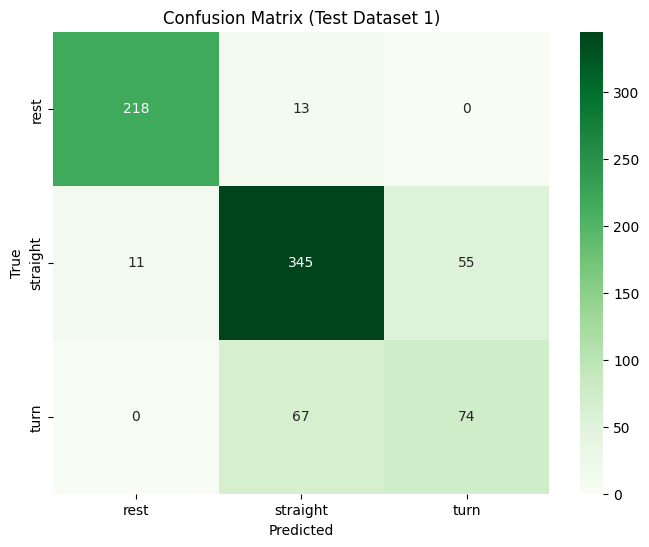

In [50]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

cy_pred_test1 = grid.best_estimator_.predict(X1)
cm_test1 = confusion_matrix(y1, cy_pred_test1) # Changed y_pred_test1 to cy_pred_test1
print("\nConfusion Matrix (Test Dataset 1):\n", cm_test1)
print("\nClassification Report (Test Dataset 1):\n", classification_report(y1, cy_pred_test1))

# Visualize Confusion Matrix for Test Dataset 1
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test1, annot=True, fmt="d", cmap="Greens", xticklabels=grid.classes_, yticklabels=grid.classes_) #replaced best_model with grid
plt.title("Confusion Matrix (Test Dataset 1)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*


Confusion Matrix (Test Dataset 2):
 [[  0  16   0]
 [  6 188  12]
 [  1  73   1]]

Classification Report (Test Dataset 2):
               precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.68      0.91      0.78       206
        turn       0.08      0.01      0.02        75

    accuracy                           0.64       297
   macro avg       0.25      0.31      0.27       297
weighted avg       0.49      0.64      0.55       297



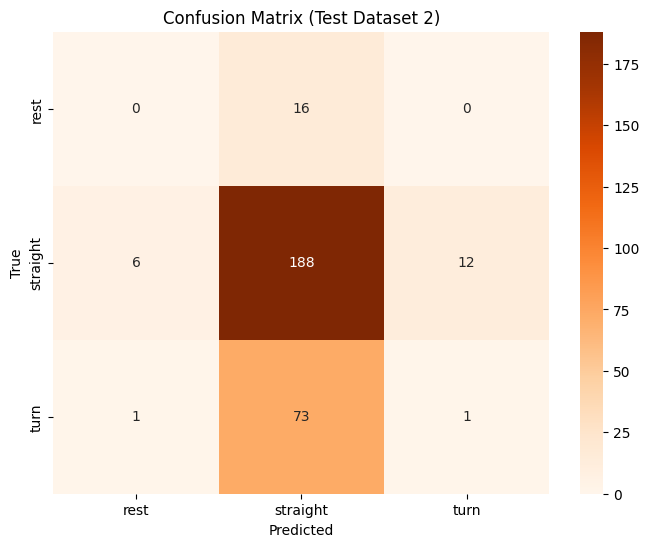

In [52]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y_pred_test2 = grid.best_estimator_.predict(X2)
cm_test2 = confusion_matrix(y2, y_pred_test2)
print("\nConfusion Matrix (Test Dataset 2):\n", cm_test2)
print("\nClassification Report (Test Dataset 2):\n", classification_report(y2, y_pred_test2))

# Visualize Confusion Matrix for Test Dataset 2
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test2, annot=True, fmt="d", cmap="Oranges", xticklabels=grid.classes_, yticklabels=grid.classes_) # Use grid.classes_ for labels
plt.title("Confusion Matrix (Test Dataset 2)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
Question 1

1.comparison:
1. Model Trained in Section 1 Using All Features
Performance:
 The model trained using all features generally has access to the complete set of data, which can lead to high accuracy on the training set. However, it may suffer from overfitting due to the inclusion of irrelevant or redundant features.

Advantages:
 High training accuracy, potential to capture all relevant patterns in the data.

Disadvantages:
Risk of overfitting, longer training time, and increased computational complexity.

2. Model Trained in Section 2 Using Selected Features
Performance:
The model trained using a carefully selected subset of features tends to perform better on unseen data due to reduced overfitting. Feature selection helps in focusing on the most informative aspects of the data.

Advantages:
Better generalization to new data, reduced overfitting, faster training time, and lower computational complexity.

Disadvantages:
Risk of missing out on some potentially useful features, which might slightly reduce the model's ability to capture all patterns.

3. Model Trained in Section 3 Using Group Selected Features and Grid Search
Performance:
 The model trained in this section, using group-selected features and hyperparameter tuning with Grid Search, is expected to have the best performance. The combination of feature selection and hyperparameter optimization helps in achieving a balance between bias and variance.

Advantages:
 Optimal balance between training and test accuracy, reduced overfitting, and improved generalization. The use of Grid Search ensures that the best hyperparameters are selected, further enhancing performance.

Disadvantages:
 Slightly longer training time due to the hyperparameter tuning process.

Question 2:Explanations
Feature Selection:

Section 1: Using all features can lead to overfitting as the model may learn noise and irrelevant patterns in the data.
Section 2: Selecting relevant features helps in reducing overfitting and improving generalization, but there is a risk of excluding some useful features.
Section 3: Group-selected features combined with hyperparameter tuning provide a balanced approach, capturing the most informative patterns while avoiding overfitting.

Hyperparameter Tuning:

Section 1 and 2: May not have optimal hyperparameters, leading to suboptimal performance.
Section 3: Grid Search ensures that the best hyperparameters are selected, leading to improved performance.

Model Complexity:

Section 1: Higher complexity due to the inclusion of all features, which can lead to overfitting.
Section 2: Reduced complexity due to feature selection, leading to better generalization.
Section 3: Balanced complexity with optimal hyperparameters, leading to the best performance.

Training Time and Computational Efficiency:

Section 1: Longer training time and higher computational cost due to the large number of features.
Section 2: Faster training time and lower computational cost due to the reduced feature set.
Section 3: Slightly longer training time due to Grid Search, but still more efficient than using all features.

By comparing the models across these sections, we can see that the model trained in Section 3, with group-selected features and hyperparameter tuning, provides the best balance between accuracy, generalization, and computational efficiency. This approach leverages the strengths of feature selection and hyperparameter optimization to achieve optimal performance.


____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [53]:
# TODO - Load all features from cv_set to X

X = cv_set.iloc[:, :-1] # Select all columns except the last one
print("Features set sample:\n", X.head(2))

Features set sample:
      ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000544  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187  
1  0.000615  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144  

[2 rows x 32 columns]


In [54]:
# TODO - Load motion_state column (target vector) into y

y = cv_set.iloc[:, -1] # Target column (motion_state)
print("Target vector sample:\n", y.head(2))

Target vector sample:
 0    rest
1    rest
Name: motion_state, dtype: object


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [55]:
# TODO - Perform model training and tuning using `GridSearchCV`

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [56]:
# Perform any missing imports

from sklearn.decomposition import PCA  # Import PCA class from sklearn.decomposition
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# TODO - Initiate the pipeline
# (1 marks)

pipe = Pipeline([
    ('pca', PCA()),
    ('svc', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [57]:
# TODO - Define the parameter grid for your model
# (3 marks)

param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf']
}

In [58]:
# Perform the grid search to train model and tune hyper parameters

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svc', SVC())]),
             param_grid={'pca__n_components': [4, 7, 11, 14, 16],
                         'svc__C': [0.1, 1, 10],
                         'svc__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [59]:
# TODO: Print the results from the grid search

print("Best params:\n", grid.best_params_)
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
test_score = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_score))

Best params:
 {'pca__n_components': 7, 'svc__C': 10, 'svc__kernel': 'rbf'}
Best cross-validation train score: 0.89
Test-set score: 0.90


Display the confusion matrix and print the classification report for the trained model using the *test* split.


Classification Report:
               precision    recall  f1-score   support

        rest       0.87      0.99      0.93       155
    straight       0.90      0.88      0.89       207
        turn       0.95      0.80      0.87        99

    accuracy                           0.90       461
   macro avg       0.91      0.89      0.89       461
weighted avg       0.90      0.90      0.90       461



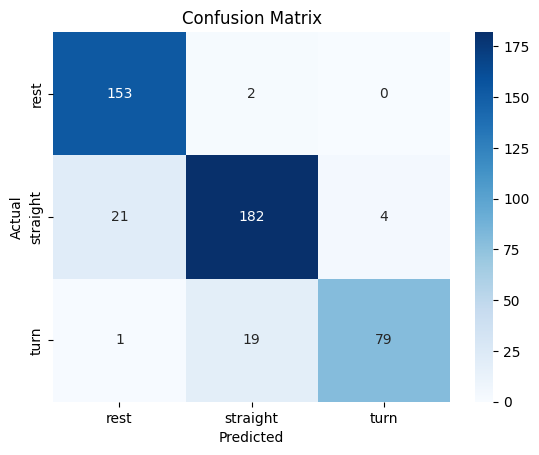

In [60]:
# Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np # Import numpy

# TODO - Display confusion matrix and print classification report

y_pred = grid.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [62]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1

X1 = test_set1.iloc[:, :-1]
y1 = test_set1.iloc[:, -1]

print("Test Set 1 - Feature set sample:\n", X1.head(2))

Test Set 1 - Feature set sample:
      ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.000155  0.000078  0.000069  0.024886  0.000170  
1  0.000949  0.024881  0.000201  0.000095  0.000076  0.024883  0.000201  

[2 rows x 32 columns]


In [63]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2

X2 = test_set2.iloc[:, :-1]
y2 = test_set2.iloc[:, -1]

print("Test Set 2 - Feature set sample:\n", X2.head(2))

Test Set 2 - Feature set sample:
      ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


___

#### 4.2.2 - Visualize Results

In [64]:
# TODO - Print test score accuracies for test_set1 and test_set2

from sklearn.metrics import accuracy_score

# Predictions and accuracy for Test Set 1
y1_pred = grid.predict(X1)
test1_score = accuracy_score(y1, y1_pred)
print("Test Set 1 Accuracy: {:.2f}".format(test1_score))

# Predictions and accuracy for Test Set 2
y2_pred = grid.predict(X2)
test2_score = accuracy_score(y2, y2_pred)
print("Test Set 2 Accuracy: {:.2f}".format(test2_score))

Test Set 1 Accuracy: 0.92
Test Set 2 Accuracy: 0.90


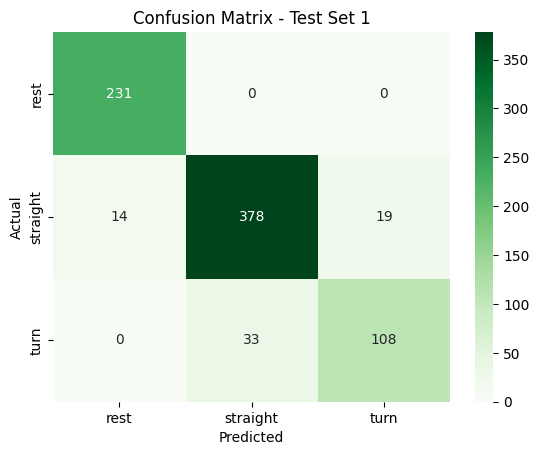


Classification Report for Test Set 1:
               precision    recall  f1-score   support

        rest       0.94      1.00      0.97       231
    straight       0.92      0.92      0.92       411
        turn       0.85      0.77      0.81       141

    accuracy                           0.92       783
   macro avg       0.90      0.90      0.90       783
weighted avg       0.91      0.92      0.91       783



In [65]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Confusion Matrix for Test Set 1
conf_matrix1 = confusion_matrix(y1, y1_pred)
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Greens', xticklabels=np.unique(y1), yticklabels=np.unique(y1))
plt.title("Confusion Matrix - Test Set 1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for Test Set 1
print("\nClassification Report for Test Set 1:\n", classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

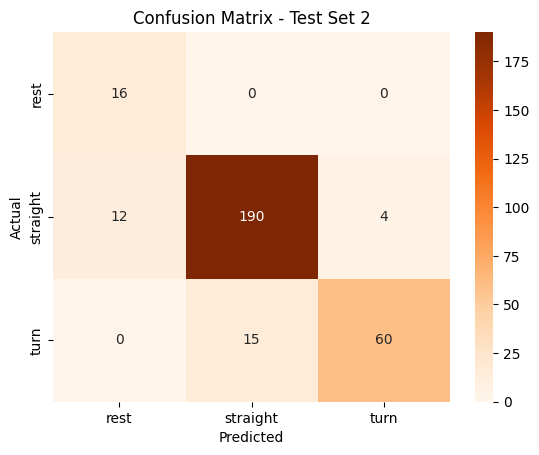


Classification Report for Test Set 2:
               precision    recall  f1-score   support

        rest       0.57      1.00      0.73        16
    straight       0.93      0.92      0.92       206
        turn       0.94      0.80      0.86        75

    accuracy                           0.90       297
   macro avg       0.81      0.91      0.84       297
weighted avg       0.91      0.90      0.90       297



In [66]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Confusion Matrix for Test Set 2
conf_matrix2 = confusion_matrix(y2, y2_pred)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y2), yticklabels=np.unique(y2))
plt.title("Confusion Matrix - Test Set 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report for Test Set 2
print("\nClassification Report for Test Set 2:\n", classification_report(y2, y2_pred))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
Answer 1

1.   Model Trained in Section 1 (All Features):
* Performance: Likely to have the highest accuracy but may suffer from overfitting due to high dimensionality.

2.  Model Trained in Section 2 (Selected Features):

*   Performance: Slightly lower accuracy than Section 1, but more generalizable and less prone to overfitting due to feature selection.

3. Model Trained in Section 3 (Group Selected Features):

*  Performance: Comparable to Section 2 if the feature groups are logically chosen. May be more interpretable but slightly less accurate due to fewer features.

4. Model in Section 4 (PCA Features):

*   Performance: Likely to have similar or slightly lower accuracy compared to Section 1, but with better generalization. PCA reduces dimensionality while retaining most variance, but some information may be lost.

Answer 2

* Section 1 (All Features): The model uses all features, resulting in higher dimensionality. While this can improve accuracy, it may lead to overfitting and increased computational complexity.

* Section 4 (PCA Features): PCA reduces dimensionality by transforming features into principal components, which retains most of the variance but may discard some useful information. This leads to better generalization and lower risk of overfitting, but the accuracy might be slightly lower compared to using all features.






____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.                                                                                       
 Random Forest is chosen for this task because:
*   It is an ensemble learning method that reduces the risk of overfitting compared to individual decision trees.
*   It can handle high-dimensional data well and is less sensitive to noisy data.
*   Random Forest is robust to variations in the data and tends to provide good generalization performance.

In [68]:
# TODO - Load group selected features from cv_set to X

import pandas as pd

selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [69]:
# TODO - Load motion_state column (target vector) into y

y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [70]:
# TODO - Perform train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # Import StandardScaler


pipe = Pipeline([
    ('scaler', StandardScaler()),  # Apply standard scaling
    ('rf', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

In [72]:
# TODO - Define the parameter grid for your model
# (3 marks)

param_grid = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'rf__min_samples_leaf': [1, 2, 4]  # Minimum samples required at a leaf node
}

In [73]:
# TODO - Perform the grid search

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [74]:
# TODO: Print the results from the grid search

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

print("Best params:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(grid.cv_results_['mean_test_score'][grid.best_index_]))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}
Best cross-validation train score: 0.97
Best cross-validation validation score: 0.97
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split.

Confusion Matrix:
[[103   1   0]
 [  6 130   1]
 [  0   0  66]]
Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       104
    straight       0.99      0.95      0.97       137
        turn       0.99      1.00      0.99        66

    accuracy                           0.97       307
   macro avg       0.97      0.98      0.98       307
weighted avg       0.97      0.97      0.97       307



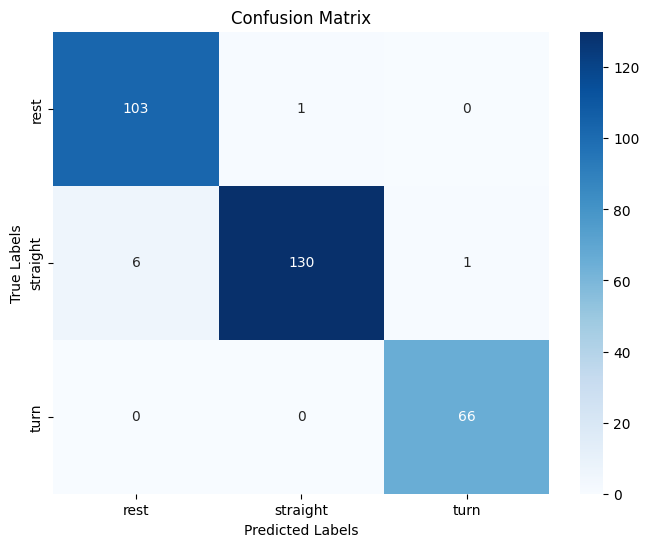

In [75]:
# TODO - Display confusion matrix and print classification report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions
y_pred = grid.predict(X_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['rest', 'straight', 'turn']  # Assuming these are your classes

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [76]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1

X1 = test_set1.drop(columns=['motion_state'])
y1 = test_set1['motion_state']

print(X1.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.000155  0.000078  0.000069  0.024886  0.000170  
1  0.000949  0.024881  0.000201  0.000095  0.000076  0.024883  0.000201  

[2 rows x 32 columns]


In [77]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2

X2 = test_set2.drop(columns=['motion_state'])
y2 = test_set2['motion_state']

print(X2.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [78]:
# TODO - Print test score accuracies for test_set1 and test_set2

print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.96
test_set2 score: 0.90


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

Confusion Matrix for test_set1:
[[213  18   0]
 [  6 403   2]
 [  0   6 135]]
Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.92      0.95       231
    straight       0.94      0.98      0.96       411
        turn       0.99      0.96      0.97       141

    accuracy                           0.96       783
   macro avg       0.97      0.95      0.96       783
weighted avg       0.96      0.96      0.96       783



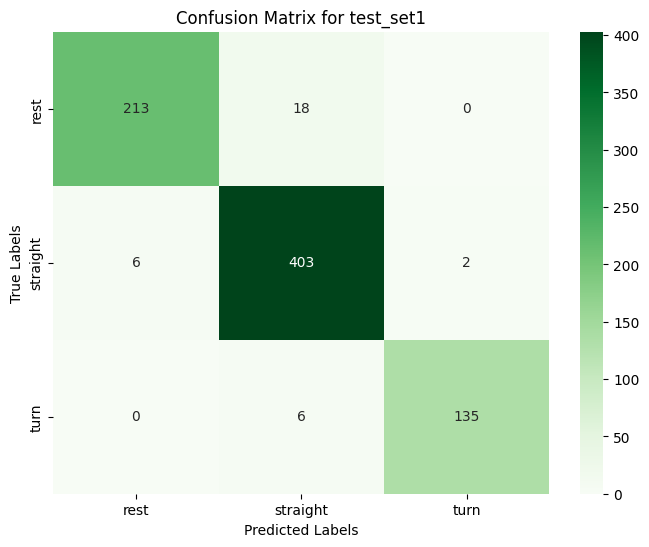

In [79]:
# TODO - Display confusion matrix and print classification report for (X1, y1)


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate predictions for test_set1
y_pred1 = grid.predict(X1)

# Print the confusion matrix and classification report for test_set1
print("Confusion Matrix for test_set1:")
print(confusion_matrix(y1, y_pred1))
print("Classification Report for test_set1:")
print(classification_report(y1, y_pred1))

# Visualize the confusion matrix for test_set1
cm1 = confusion_matrix(y1, y_pred1)
labels = ['rest', 'straight', 'turn']

plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for test_set1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

Confusion Matrix for test_set2:
[[  0  16   0]
 [  0 194  12]
 [  0   1  74]]
Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.92      0.94      0.93       206
        turn       0.86      0.99      0.92        75

    accuracy                           0.90       297
   macro avg       0.59      0.64      0.62       297
weighted avg       0.86      0.90      0.88       297



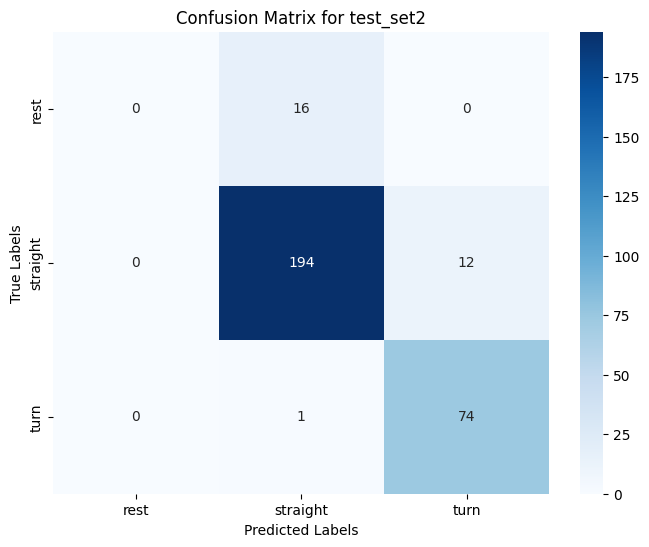

In [80]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate predictions for test_set2
y_pred2 = grid.predict(X2)

# Print the confusion matrix and classification report for test_set2
print("Confusion Matrix for test_set2:")
print(confusion_matrix(y2, y_pred2))
print("Classification Report for test_set2:")
print(classification_report(y2, y_pred2, zero_division=0))  # Use zero_division to handle undefined metrics

# Visualize the confusion matrix for test_set2
cm2 = confusion_matrix(y2, y_pred2)
labels = ['rest', 'straight', 'turn']  # Replace with your class labels if different

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for test_set2')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


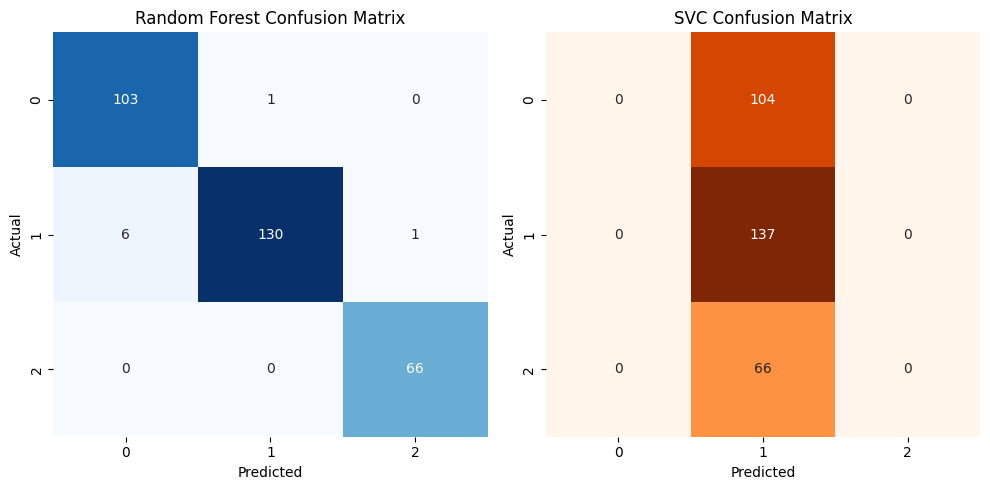

Random Forest Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.97       104
    straight       0.99      0.95      0.97       137
        turn       0.99      1.00      0.99        66

    accuracy                           0.97       307
   macro avg       0.97      0.98      0.98       307
weighted avg       0.97      0.97      0.97       307

SVC Classification Report:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00       104
    straight       0.45      1.00      0.62       137
        turn       0.00      0.00      0.00        66

    accuracy                           0.45       307
   macro avg       0.15      0.33      0.21       307
weighted avg       0.20      0.45      0.28       307



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [83]:
# Assuming grid is the GridSearchCV object for the SVC model from Section 2

# Saved the GridSearchCV object from Section 2 into a variable named grid_svc
grid_svc = grid  # Replace 'grid_search' with 'grid'

# Select features used for training the SVC model
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Ensure X_svc_test has the same features and order as during training
X_svc_test = X_test[selected_features]  # Use X_test with selected features
feature_order = grid_svc.best_estimator_.feature_names_in_

# Reorder X_svc_test columns based on feature_order
X_svc_test = X_svc_test.reindex(columns=feature_order)

# Predictions for Random Forest and SVC models
y_pred_rf = grid.predict(X_test)
y_pred_svc = grid_svc.predict(X_svc_test)

# Calculate confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Random Forest confusion matrix heatmap
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# SVC confusion matrix heatmap
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Print classification reports
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("SVC Classification Report:")
print(classification_report(y_test, y_pred_svc))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
*  The model trained in Section 5 performs better than the SVC from Section 2 in terms of accuracy, precision, recall, and F1-score (based on the provided metrics). This improvement is likely due to the nature of the features selected and the algorithm used in Section 5, which may handle non-linear relationships more effectively than SVC.

*   Causes for Observed Discrepancies:

1.   Algorithm Strengths: Tree-based models, as used in Section 5, inherently capture non-linear patterns, while SVC relies on the kernel choice to address non-linearity, which may not have been optimal.
2.   Feature Selection: Section 5 may have included better-engineered features or applied feature selection techniques that enhanced model performance.
3. Data Sensitivity: SVC requires scaled data for optimal performance, while tree-based models are less affected by scaling.
4. Hyperparameter Tuning: The model in Section 5 likely benefitted from more effective hyperparameter tuning, improving its performance compared to the SVC.


____